In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

En muchos problemas de analítica de datos puede ser necesario reducir el número de variables:

* Porque el espacio de características es muy elevado en relación con el número de muestras disponibles
* Porque se quiere encontrar un espacio de representación con mejor capacidad de separación (problemas de clasificación)
* Porque se desea visualizar la distribución de las muestras aunque éstas estén en una dimensión mayor a 3.

## Principal Component Analysis (PCA)

Ver [A Tutorial on Principal Component Analysis](https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf) para una descripción intuitiva de PCA y SVD.

El <b>Análisis de Componentes Principales</b> (En inglés Principal Component Analysis - PCA), es una técnica de extracción cuyo objetivo es reducir  la dimensión de un conjunto de variables, conservando la mayor cantidad de información que sea posible.

La medida de información en PCA está asociada entonces al <mark>nivel de variación</mark> de las variables.

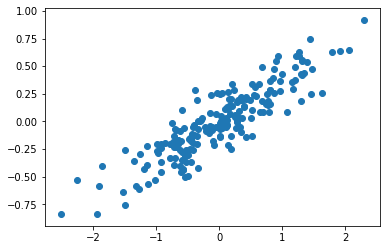

In [2]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T+10

# center data on 0,0
X=X-np.mean(X, axis=0)

plt.scatter(X[:,0], X[:,1])

### Veamos algunas proyecciones posibles

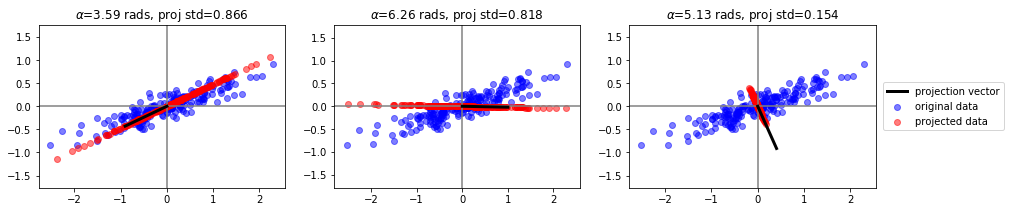

In [3]:
plt.figure(figsize=(15,3))

unit_vector = lambda angle: np.array([np.cos(angle), np.sin(angle)])

for i in range(3):
    plt.subplot(1,3,i+1)
    angle = np.random.random()*np.pi*2
    v = unit_vector(angle)

    c = X.dot(v.reshape(-1,1))/(np.linalg.norm(v)**2)
    Xp = np.repeat(v.reshape(-1,2),len(X),axis=0)*c

    plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="original data")
    plt.scatter(Xp[:,0], Xp[:,1], color="red", alpha=.5, label="projected data")
    plt.axvline(0, color="gray")
    plt.axhline(0, color="gray")
    plt.plot([0,v[0]], [0,v[1]], color="black", lw=3, label="projection vector")
    plt.axis('equal')
    plt.ylim(-2,2)
    plt.title("$\\alpha$=%.2f rads, proj std=%.3f"%(angle, np.std(c)))
    if i==2:
        plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

Es fácil concluir de manera intuitiva que la proyección que conserva mayor cantidad de varianza, es la misma que conserva de mejor manera la posiciones relativas de las muestras, es decir la que intenta conservar la estructura de los datos originales pero en una dimensión menor.

#### Formalmente...

Supongamos que contamos con un matriz $\bf{X}$ que contiene $N$ muestras cada una de $d$ variables. Para el cálculo de las proyecciones de PCA es necesario que los elementos de la matriz $\bf{X}$ tengan media cero, así que suponemos que previamente hemos extraído la media a cada una de las variables. Por lo tanto la matriz de covarianza de los datos está dada por:

 $${\bf{S}} = \frac{1}{N}{\bf{X}}^T{\bf{X}}$$

Lo que buscamos:

<img src="imgs/PCA1.png" alt="SFS" width="400"/>

$$z_i={\bf{u}}_1^T {\bf{x}}_i$$

Para intentar conservar la estructura original se puede plantear que la distancia entre el punto original y su proyección sea la más corta posible, por lo tanto si $r_i$ es la distancia entre el punto ${\bf{x}}_i$ y su proyección sobre la dirección ${\bf{u}}_1$, el objetivo es:

$$\mathop {\min }\limits_{{\bf{u}}_1} \sum_{i=1}^{N} r_{i}^{2} = \mathop {\min }\limits_{{\bf{u}}_1} \sum_{i=1}^{N} |{\bf{x}}_i - z_i {\bf{u}}_1|^{2}$$

Lo que implica encontrar el vector ${\bf{u}}_1$ que maximice $z_i^{2}$, osea:

$$\mathop {\max }\limits_{{\bf{u}}_1} \sum_{i=1}^{N} z_{i}^{2} = \mathop {\max }\limits_{{\bf{u}}_1} \sum_{i=1}^{N} {\bf{u}}_1^{T} {\bf{x}}_i^{T} {\bf{x}}_i {\bf{u}}_1 $$

Teniendo en cuenta la proyección de toda la matriz ${\bf{X}}$,

$${\bf{z}}_1 = {\bf{X}} {\bf{u}}_1$$

$$\frac{1}{N} {\bf{z}}_1^{T}{\bf{z}}_1 = \frac{1}{N} {\bf{u}}_1^{T} {\bf{X}}^{T} {\bf{X}} {\bf{u}}_1 = {\bf{u}}_1^{T} {\bf{S}} {\bf{u}}_1 $$

donde ${\bf{S}}$ es la matriz de covarianza.

Para que el valor de ${\bf{u}}_1$ no crezca indiscriminadamente durante la maximización, es necesario limitar su valor (Lo importante del vector ${\bf{u}}_1$ es su dirección). La restricción se introduce a través de multiplicadores de Lagrange:

$$M = {\bf{u}}_1^{T} {\bf{S}} {\bf{u}}_1 - \lambda ({\bf{u}}_1^{T}{\bf{u}}_1 - 1)$$

Derivando e igualando a cero:

$$\frac{\partial M}{\partial {\bf{u}}_1} = 2 {\bf{S}} {\bf{u}}_1  - 2\lambda {\bf{u}}_1 = 0$$

Da como resultado

$${\bf{S}} {\bf{u}}_1  = \lambda {\bf{u}}_1$$

Esto significa que ${\bf{u}}_1$ es un vector propio de la matriz ${\bf{S}}$ y está asociado al valor propio $\lambda$.

Si premultiplicamos a ambos lados de la ecuación anterior por ${\bf{u}}_1^T$ nos da como resultado la covarianza de ${\bf{z}}_1$ y como el objetivo es que la varianza sea muy grande, entonces eso implica que el vector propio que debemos seleccionar es aquel que esté asociado al mayor valor propio. En resumen, el vector propio asociado al mayor valor propio ${\bf{S}}$ corresponde al <b>primer componente principal</b>.

En general, es posible hallar el espacio de dimensión $p<d$ que mejor represente los datos, el cual está dado por los vectores propios asociados a los $p$ mayores valores propios de ${\bf{S}}$. Estas nuevas direcciones se denominan direcciones principales de los datos y las proyecciones de los datos originales sobre estas direcciones se conocen como <b>componentes principales</b>.

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

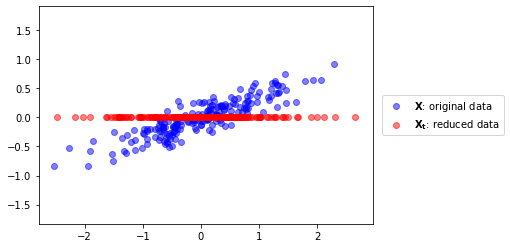

In [5]:
pca.fit(X)
Xt = pca.transform(X)[:,0]
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="$\mathbf{X}$: original data")
plt.scatter(Xt, [0]*len(Xt), color="red", alpha=.5, label="$\mathbf{X_t}$: reduced data")
plt.axis("equal");
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

Podemos reconstruir las proyecciones en 2D 

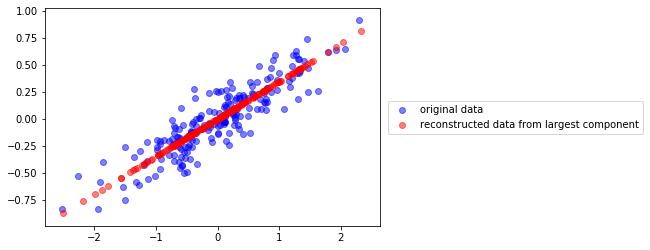

In [7]:
u0 = pca.components_[0]
c = X.dot(u0)
Xr = np.r_[[i*u0 for i in c]]
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="original data")
plt.scatter(Xr[:,0], Xr[:,1], color="red", alpha=.5, label="reconstructed data from largest component")
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

## Ejemplo en reconocimiento de rosotros (EigenFaces)

Tomado de : http://nbviewer.ipython.org/github/ogrisel/notebooks/blob/master/Labeled%20Faces%20in%20the%20Wild%20recognition.ipynb

In [9]:
import pylab as pl

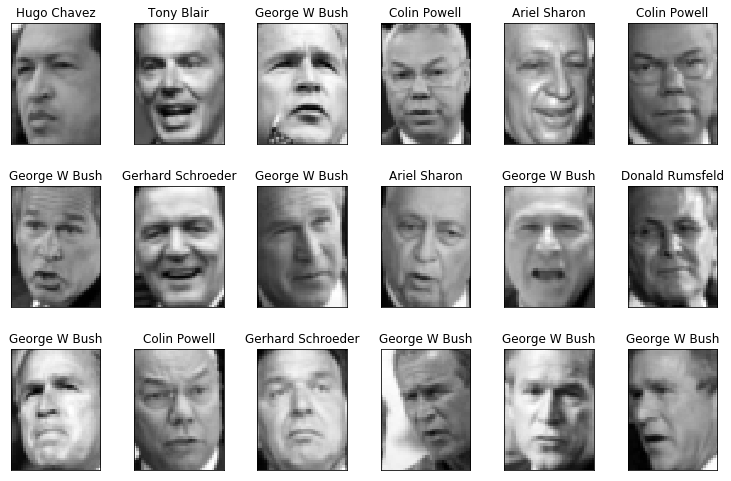

In [10]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

n_samples, n_features = X.shape
_, h, w = lfw_people.images.shape
n_classes = len(names)
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    pl.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.title(titles[i], size=12)
        pl.xticks(())
        pl.yticks(())

plot_gallery(X, names[y], h, w)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(966, 1850)


In [19]:
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized',whiten=True)

%time pca.fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

Extracting the top 150 eigenfaces from 966 faces
CPU times: user 231 ms, sys: 1.4 s, total: 1.64 s
Wall time: 113 ms


#### Veamos los componentes principales reconstruidos en forma de imágen

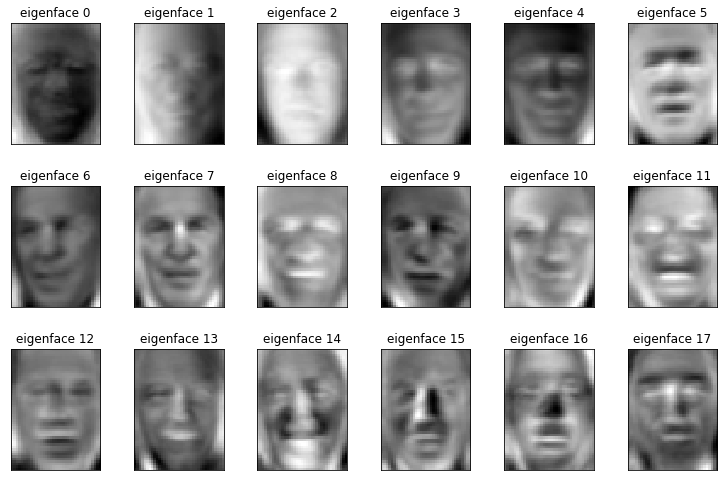

In [20]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

### Selección del número de componentes

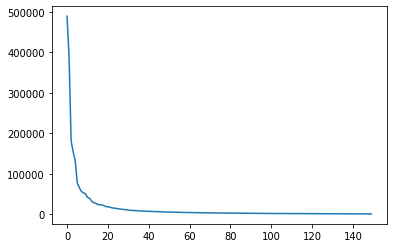

In [21]:
plt.plot(pca.explained_variance_);

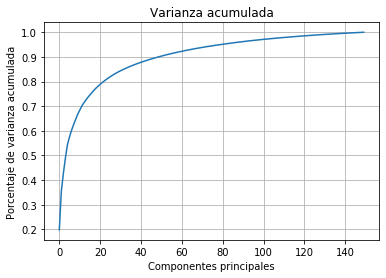

In [27]:
plt.plot(np.cumsum(pca.explained_variance_/np.sum(pca.explained_variance_)))
plt.title('Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje de varianza acumulada')
plt.grid()

## Kernel PCA

Usando el truco del kernel también es posible generalizar PCA para realizar transformaciones no lineales de los datos. Si asumimos que existe una función de transformación $\phi$, la matriz de covarianza en el espacio transformado será:

$${\bf{C}} = \frac{1}{N} \sum_{i=1}^N \phi{{\bf{x}}_i}\phi{{\bf{x}}_i}^T$$

El problema de valores y vectores propios será:

$${\bf{C}}{\bf{v}} = \lambda {\bf{v}}$$

Donde el vector de transformación ${\bf{v}}$ estará dado por:

$${\bf{v}} = \sum_{i=1}^N \alpha_i \phi({\bf{x}}_i)$$

Se pueden entonces llegar a un problema dual de vectores y valores propios dado por:

$$N\lambda{\bf{\alpha}} = {\bf{K}} {\bf{\alpha}}$$

donde ${\bf{K}}$ es la matriz kernel que contiene a $K_{ij} = k({\bf{x}}_i,{\bf{x}}_j)$. La transformación de una muestra se puede obtener de:

$$\langle {\bf{v}}, \phi({\bf{x}}) \rangle = \sum_{i=1}^N \alpha_i k({\bf{x}}_i,{\bf{x}})$$

In [31]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles
# Create linearly inseparable data
X, Y = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

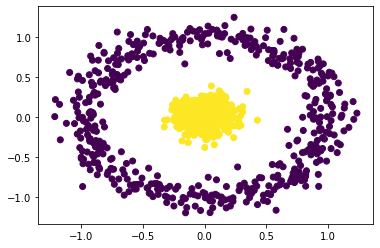

In [34]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [35]:
# Apply kernal PCA with radius basis function (RBF) kernel
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1)
X_kpca = kpca.fit_transform(X)

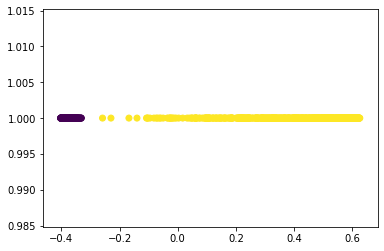

In [40]:
plt.scatter(X_kpca,np.ones(len(X_kpca)),c=Y)

In [36]:
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kpca.shape[1])

Original number of features: 2
Reduced number of features: 1


# Visualización de datos en baja dimensión

La interpretación de datos en alta dimensión puede ser difícil. Una de las aplicaciones de los métodos de reducción de dimensión, es permitir la visulización de los datos en 2D o 3D. En este caso el objetivo de las técnicas es principalmente conservar las vecindades de los datos originales, por lo que la mayoría de las técnicas que se utilizan para eso propósito son no lineales y están basadas en el concepto de **manifold learning**.

Una variedad o manifold es un espacio topológico que mantiene propiedades de los espacios euclidianos pero de manera local.

## Multi-dimensional-Scaling (MDS)

MDS se enfoca en crear un mapeo que preserve la distancia relativa entre los datos. Si dos puntos están cercanos en el espacio de características, deberían estar cercanos en el espacio latente y de esa manera podremos visualizar la estructura de los datos en baja dimensión más fácilmente.

La función de costo penaliza el modelo si las distancias relativas son diferentes en ambos espacios. En MDS se optimiza ${\bf{z}}$ directamente con la siguiente función de costo:

$$J({\bf{z}}) = \sum_{i=1}^N \sum_{j=i+1}^N (||{\bf{z}}_i - {\bf{z}}_j|| - ||{\bf{x}}_i-{\bf{x}}_j||)^2$$

Se pueden usar otro tipo de métricas.

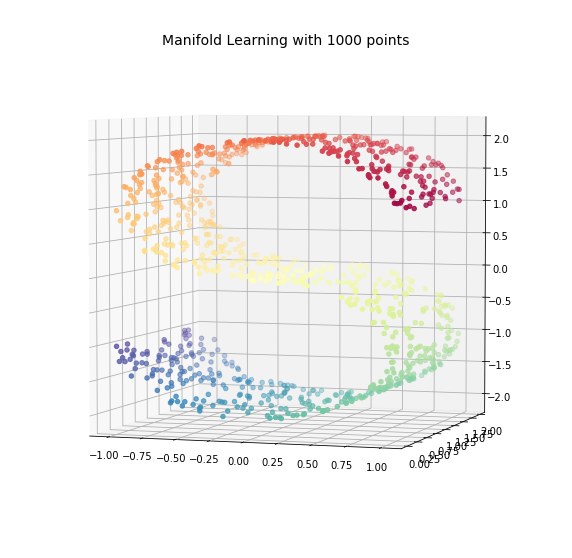

In [52]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D


n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
Axes3D
# Create figure
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Manifold Learning with %i points"
             % (1000), fontsize=14)
ax.view_init(4, -72)

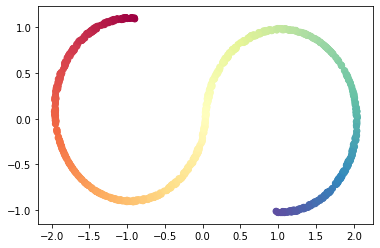

In [55]:
#PCA
n_components = 2
pca1 = PCA(n_components=n_components)
X2 = pca1.fit_transform(X)

plt.scatter(X2[:, 0], X2[:, 1],c=color, cmap=plt.cm.Spectral)

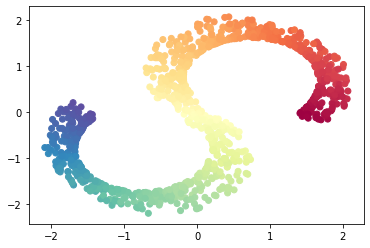

In [54]:
#MDS

mds = manifold.MDS(n_components, max_iter=100, n_init=1)
X2 = mds.fit_transform(X)

plt.scatter(X2[:, 0], X2[:, 1],c=color, cmap=plt.cm.Spectral)

## t-Distributed Stochastic Neighbor Embedding (t-SNE)


Se puede considerar como un caso especial de MDS con las siguientes funciones de distancia:

$$J({\bf{z}}) = \sum_{i=1}^N \sum_{j=i+1}^N d_3(d_2({\bf{z}}_i - {\bf{z}}_j) - d_1({\bf{x}}_i-{\bf{x}}_j))$$

La distancia $d_1$ entre las dos muestras $i$, $j$ en el espacio de entrada se mide a partir de distribuciones Gausianas condicionales:

$$p_{ij} = \frac{p_{i|j + p_j|i}}{2N}$$

$$p_{j|i} = \frac{\exp(-||{\bf{x}}_i - {\bf{x}}_j||^2/2\sigma_i^2)}{\sum_{k \neq i} \exp(-||{\bf{x}}_i - {\bf{x}}_k||^2/2\sigma_i^2)}$$

La distancia $d_2$ entre dos puntos $i$ y $j$ en el espacio latente está dada por:

$$q_{ij}= \frac{ (1 + ||{\bf{z}}_i - {\bf{z}}_j||^2)^{-1}}{\sum_{k \neq i} (1 + ||{\bf{z}}_i - {\bf{z}}_m||^2)^{-1}}$$

Es similar a la distancia de $d_1$, pero está basada en una distribución $t$-Student en lugar de una distribución Gausiana. Esto permite a objetos distintos ser modelados lejos unos de otros.

Finalmente se usa la divergencia de Kullback-Leibler (KL) para medir la diferencia entre las distribuciones $d_1$ y $d_2$:

$$D_{KL}(p||q)=\sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}$$

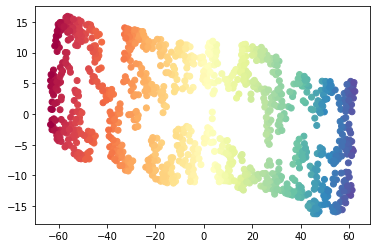

In [56]:
tSNE = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
X2 = tSNE.fit_transform(X)

plt.scatter(X2[:, 0], X2[:, 1],c=color, cmap=plt.cm.Spectral)

### Recordemos el ejercicio de agrupamiento de perfiles de consumo de energía

Text(0.5, 0, 'hour')

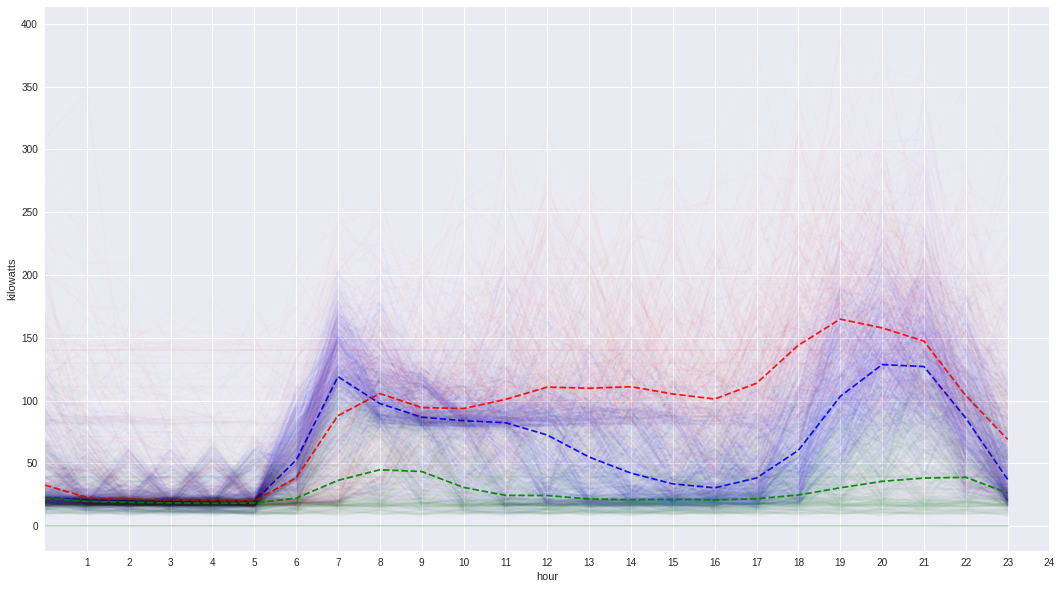

In [60]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

plt.style.use('seaborn')
data_path =  'local/data/household_power_consumption.txt'
cols_to_use = ['Date', 'Time','Global_active_power', 'Global_reactive_power']
df_uci = pd.read_csv(data_path, sep=';', usecols=cols_to_use, low_memory=False)
df_uci['datetime'] = pd.to_datetime(df_uci['Date'] + ' '+ df_uci['Time'])
df_uci = df_uci.drop(['Date','Time'], axis=1)
df_uci = df_uci.set_index('datetime')

df_uci = df_uci.replace('?', np.nan)
df_uci = df_uci.astype(np.float).fillna(method='bfill')
df_uci_hourly = df_uci.resample('H').sum()
df_uci_hourly['hour'] = df_uci_hourly.index.hour
df_uci_hourly.index = df_uci_hourly.index.date
df_uci_pivot = df_uci_hourly.pivot(columns='hour',values='Global_active_power') #index='foo', columns='bar', values='baz'
df_uci_pivot = df_uci_pivot.dropna()
X = df_uci_pivot.values.copy()

kmeans = KMeans(n_clusters=3)
cluster_found = kmeans.fit_predict(X)
cluster_found_sr = pd.Series(cluster_found, name='cluster')
df_uci_pivot = df_uci_pivot.set_index(cluster_found_sr, append=True )

fig, ax= plt.subplots(1,1, figsize=(18,10))
color_list = ['blue','red','green']
cluster_values = sorted(df_uci_pivot.index.get_level_values('cluster').unique())

for cluster, color in zip(cluster_values, color_list):
    df_uci_pivot.xs(cluster, level=1).T.plot(
        ax=ax, legend=False, alpha=0.01, color=color, label= f'Cluster {cluster}'
        )
    df_uci_pivot.xs(cluster, level=1).median().plot(
        ax=ax, color=color, alpha=0.9, ls='--'
    )

ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')

Text(0.5, 1.0, 'Visualización con t-SNE')

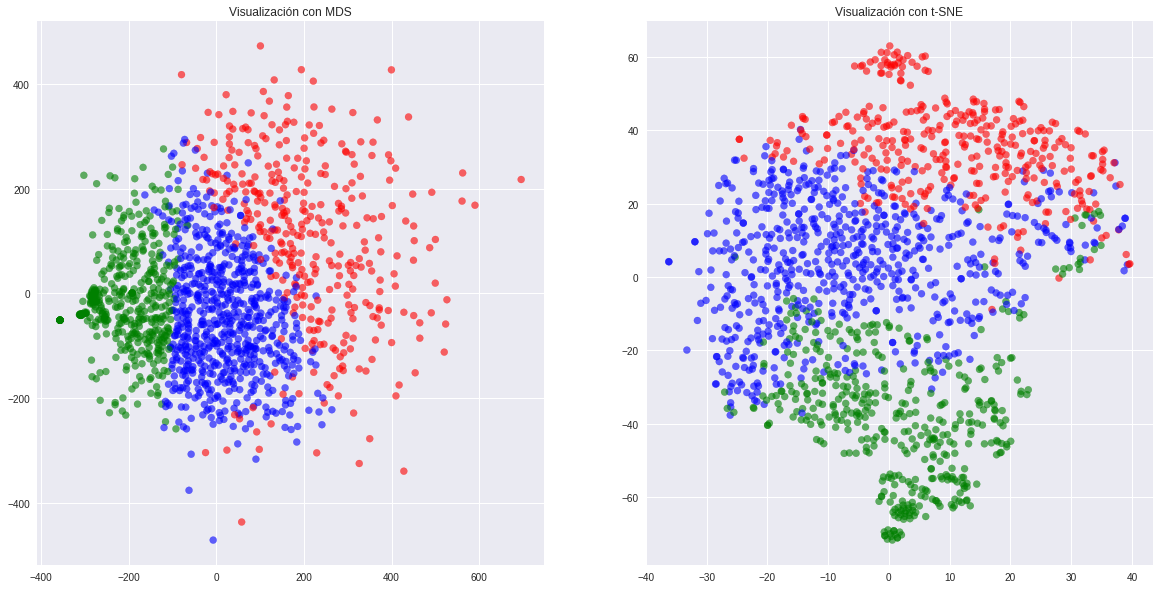

In [66]:
import matplotlib.colors
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
mds = manifold.MDS()
results_mds = mds.fit_transform(X)

tsne = manifold.TSNE()
results_tsne = tsne.fit_transform(X)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list(cluster_values, color_list)
ax1.scatter(results_mds[:,0], results_mds[:,1],
    c=df_uci_pivot.index.get_level_values('cluster'),
    cmap=cmap, 
    alpha=0.6, 
    )
ax1.set_title('Visualización con MDS')
ax2.scatter(results_tsne[:,0], results_tsne[:,1],
    c=df_uci_pivot.index.get_level_values('cluster'),
    cmap=cmap, 
    alpha=0.6, 
    )
ax2.set_title('Visualización con t-SNE')